# ML Feature enginerring 

In [1]:
%matplotlib inline
%run talibref.py
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

### Get data

In [2]:
#df=pd.read_csv("data/IYZ.csv")
ticker = 'IYZ'
startdate=datetime.date(2010, 1, 1)
enddate=datetime.date.today()
df = generate_ticker_data(ticker, startdate, enddate)
df.head()

Available data: Ticker(IYZ) from 2000.05.26 to 2015.11.27
Usable data: Ticker(IYZ) from 2001.03.14 to 2015.11.27 
Returned data: Ticker(IYZ) from 2010.01.04 to 2015.11.27 
Save path: data/IYZ_from_2010.01.04_2015.11.27.csv


,date,open,high,low,close,volume,close_1,result_1,perf_1,close_14,result_14,perf_14,results,bb_upper,bb_middle,bb_lower,bb_pct,bb_bandwidth,bb_squeeze,bb_signalup,bb_signaldn,bb_signal,ema50,ema150,ema200,ema_signal1,ema_signal2,kama50,kama150,kama200,kama_signal1,kama_signal2,sar,sar_signal,adx,plus_di,minus_di,adx_trend,adx_direction,adx_signal,aroon_osc,aroon_signal,cci,cci_signal,macd,macd_sigline,macd_hist,macd_signal,ppo,ppo_signal,mfi,mfi_signal,roc,roc_signal,rsi,rsi_signal,ult_osc,ult_signal,willr,wr_signal,ad_osc,ad_signal,stoch_slowk,stoch_slowd,sslow_signal,stoch_fastk,stoch_fastd,srsi_signal,trix,trix_signal,sr_pivotpts,sr_res1,sr_sup1,sr_res2,sr_sup2,sr_res3,sr_sup3,cv_signal
0,2010-01-04,20.370001,20.549999,20.270000,20.549999,664200,20.680000,True,0.006326,18.719999,False,-0.089051,0,20.545079,19.9480,19.350920,1.004120,5.986360,False,True,False,0,19.245605,18.471530,18.441038,1,1,19.030765,18.366468,18.470379,1,1,19.822958,1,34.171492,33.666344,15.692957,True,True,1,96,1,122.917840,1,0.393756,0.403865,-0.010110,0,2.048084,1,79.657038,0,4.900454,0,68.259660,0,56.239960,0,-0.000000,0,694259.549529,1,49.166583,52.670801,0,81.338670,27.112890,0,0.164700,1,20.456666,22.773333,20.363333,22.866666,18.046666,25.183333,17.953333,0
1,2010-01-05,20.610001,20.760000,20.459999,20.680000,1214800,20.340000,False,-0.016441,18.900000,False,-0.086074,0,20.632786,20.0125,19.392214,1.038058,6.198986,False,True,False,0,19.301856,18.500781,18.463316,1,1,19.120883,18.404560,18.516717,1,1,19.881121,1,34.807420,36.435763,14.496814,True,True,1,100,1,149.707718,1,0.410108,0.405114,0.004994,1,2.058941,1,81.099707,0,4.444450,0,69.920669,0,60.808637,0,-6.666661,0,828264.024156,1,63.063063,50.743160,0,100.000000,60.446223,0,0.170615,1,20.633333,23.106666,20.506666,23.233333,18.033333,25.706666,17.906666,0
2,2010-01-06,20.719999,20.730000,20.270000,20.340000,804600,20.260000,False,-0.003933,18.600000,False,-0.085546,0,20.667400,20.0395,19.411600,0.739290,6.266626,False,False,False,0,19.342568,18.525142,18.481989,1,1,19.183869,18.435459,18.545405,1,1,19.969009,1,34.451424,32.362519,17.493670,True,True,1,96,1,85.708389,1,0.391124,0.402316,-0.011192,0,2.041574,1,76.927311,0,1.345291,0,60.938720,0,54.881580,0,-34.999971,0,629694.026402,1,77.477477,63.235708,0,10.627286,63.988652,1,0.175967,1,20.446667,22.583334,20.133333,22.896668,17.996666,25.033335,17.683332,0
3,2010-01-07,20.340000,20.379999,20.160000,20.260000,471900,20.110001,False,-0.007404,18.570000,False,-0.083416,0,20.677310,20.0705,19.463690,0.656144,6.046787,False,False,False,0,19.378545,18.548120,18.499681,1,1,19.249017,18.462442,18.574249,1,1,20.048108,1,33.614615,30.600584,19.263447,True,True,1,92,1,24.268894,1,0.365411,0.394935,-0.029524,0,1.902912,1,72.638398,0,-0.246179,0,59.017652,0,53.230087,0,-41.666632,0,477566.554469,1,54.954955,65.165165,0,0.000000,36.875762,1,0.180626,1,20.266666,22.223334,19.773333,22.716667,17.816665,24.673335,17.323332,1
4,2010-01-08,20.250000,20.250000,20.020000,20.110001,549100,20.150000,True,0.001989,18.400000,False,-0.085032,0,20.670872,20.0925,19.514128,0.515130,5.757097,False,False,False,0,19.407230,18.568807,18.515704,1,1,19.296817,18.485820,18.599729,1,1,20.760000,0,32.227258,28.760971,21.612208,True,True,1,88,1,-45.787970,1,0.329136,0.381775,-0.052639,0,1.685848,1,70.597898,0,-0.049702,0,55.485710,0,53.570511,0,-54.621765,0,333937.741315,1,29.279324,53.903919,0,0.000000,3.542429,1,0.184391,1,20.126667,21.943335,19.493334,22.576668,17.676666,24.393336,17.043333,0


In [4]:
dftouse=df.copy()

### Feature Engineering

In [5]:
IGNORE = ['date', 'result_1','close_1','perf_1','result_14','close_14','perf_14','results']

In [285]:
INDICATORS=[]
for v in df.columns:
    l=df[v].unique()
    if len(l) <= 10 and v not in IGNORE:
        #print v, l
        INDICATORS.append(v)

In [286]:
STANDARDIZABLE = []
for v in df.columns:
    if v not in INDICATORS and v not in IGNORE:
        #print v
        STANDARDIZABLE.append(v)

In [10]:
dftouse['date'] = pd.to_datetime(dftouse['date'])
mask = (dftouse.date < '2015-01-01').values
mask.shape, mask.sum()

((1487L,), 1258)

#### 1.2 Standardize the data

Use the mask to compute the training and test parts of the dataframe. Use `StandardScaler` from `sklearn.preprocessing` to "fit" the columns in `STANDARDIZABLE` on the training set. Then use the resultant estimator to transform both the training and the test parts of each of the columns in the dataframe, replacing the old unstandardized values in the `STANDARDIZABLE` columns of `dftouse` by the new standardized ones.

In [11]:
#your code here
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(dftouse[mask][STANDARDIZABLE])
dftouse[STANDARDIZABLE] = scaler.transform(dftouse[STANDARDIZABLE])
dftouse.head()

,date,open,high,low,close,volume,close_1,result_1,perf_1,close_14,result_14,perf_14,results,bb_upper,bb_middle,bb_lower,bb_pct,bb_bandwidth,bb_squeeze,bb_signalup,bb_signaldn,bb_signal,ema50,ema150,ema200,ema_signal1,ema_signal2,kama50,kama150,kama200,kama_signal1,kama_signal2,sar,sar_signal,adx,plus_di,minus_di,adx_trend,adx_direction,adx_signal,aroon_osc,aroon_signal,cci,cci_signal,macd,macd_sigline,macd_hist,macd_signal,ppo,ppo_signal,mfi,mfi_signal,roc,roc_signal,rsi,rsi_signal,ult_osc,ult_signal,willr,wr_signal,ad_osc,ad_signal,stoch_slowk,stoch_slowd,sslow_signal,stoch_fastk,stoch_fastd,srsi_signal,trix,trix_signal,sr_pivotpts,sr_res1,sr_sup1,sr_res2,sr_sup2,sr_res3,sr_sup3,cv_signal
0,2010-01-04,-1.169181,-1.157299,-1.15216,-1.118360,0.639008,20.680000,True,0.006326,18.719999,False,-0.089051,0,-1.321332,-1.279148,-1.221656,1.341702,-0.221542,False,True,False,0,-1.460919,-1.606757,-1.590867,1,1,-1.591087,-1.687069,-1.676153,1,1,-1.257753,1,1.219553,1.264466,-1.068669,True,True,1,1.313898,1,1.004782,1,1.390227,1.549988,-0.096380,0,1.164215,1,1.561731,0,1.442156,0,1.356830,0,0.191720,0,1.334246,0,1.564001,1,-0.269844,-0.148049,0,0.698039,-0.732738,0,1.451422,1,-1.142985,-0.827349,-0.890331,-1.051099,-1.175919,-0.728905,-0.909411,0
1,2010-01-05,-1.101747,-1.098349,-1.09877,-1.081848,2.142760,20.340000,False,-0.016441,18.900000,False,-0.086074,0,-1.296796,-1.260871,-1.209938,1.443046,-0.155418,False,True,False,0,-1.444752,-1.598041,-1.584059,1,1,-1.563987,-1.675790,-1.662338,1,1,-1.241792,1,1.295293,1.656456,-1.216766,True,True,1,1.378875,1,1.253799,1,1.457677,1.555591,0.078078,1,1.171118,1,1.645223,0,1.297461,0,1.505069,0,0.626544,0,1.120493,0,1.930265,1,0.257237,-0.227046,0,1.139066,0.256536,0,1.519308,1,-1.093350,-0.737175,-0.851602,-0.950513,-1.179561,-0.593715,-0.921427,0
2,2010-01-06,-1.070840,-1.106770,-1.15216,-1.177339,1.022456,20.260000,False,-0.003933,18.600000,False,-0.085546,0,-1.287113,-1.253220,-1.204436,0.550893,-0.134384,False,False,False,0,-1.433052,-1.590782,-1.578353,1,1,-1.545047,-1.666641,-1.653785,1,1,-1.217674,1,1.252893,1.079920,-0.845719,True,True,1,1.313898,1,0.658914,1,1.379371,1.543035,-0.108883,0,1.160075,1,1.403751,0,0.314070,0,0.703464,0,0.062437,0,0.212042,0,1.387529,1,0.803962,0.284918,0,-0.973098,0.361669,1,1.580734,1,-1.145794,-0.878748,-0.952477,-1.042869,-1.189577,-0.767654,-0.978934,0
3,2010-01-07,-1.177611,-1.205021,-1.18307,-1.199808,0.113814,20.110001,False,-0.007404,18.570000,False,-0.083416,0,-1.284341,-1.244436,-1.189654,0.302612,-0.202750,False,False,False,0,-1.422711,-1.583935,-1.572947,1,1,-1.525456,-1.658651,-1.645185,1,1,-1.195968,1,1.153228,0.830531,-0.626599,True,True,1,1.248921,1,0.087822,1,1.273312,1.509911,-0.320626,0,1.071905,1,1.155536,0,-0.190918,0,0.532015,0,-0.094744,0,-0.001712,0,0.971730,1,-0.050296,0.363990,0,-1.224255,-0.442993,1,1.634198,1,-1.196366,-0.976136,-1.049750,-1.092248,-1.238745,-0.860651,-1.071632,1
4,2010-01-08,-1.202899,-1.241514,-1.22241,-1.241936,0.324656,20.150000,True,0.001989,18.400000,False,-0.085032,0,-1.286142,-1.238202,-1.175341,-0.118472,-0.292838,False,False,False,0,-1.414467,-1.577770,-1.568050,1,1,-1.511082,-1.651729,-1.637589,1,1,-1.000611,0,0.987992,0.570148,-0.335794,True,True,1,1.183944,1,-0.563369,1,1.123685,1.450854,-0.587622,0,0.933880,1,1.037445,0,-0.128574,0,0.216803,0,-0.062344,0,-0.417092,0,0.579160,1,-1.024149,-0.097513,0,-1.224255,-1.432267,1,1.677407,1,-1.235698,-1.051881,-1.125406,-1.130653,-1.276986,-0.932983,-1.143730,0


We create a list `lcols` of the columns we will use in our classifier. This list should not contain the response `RESP`. How many features do we have?

In [12]:
#lcols=list(dftouse.columns)
#lcols.remove(u'results')
lcols=[]
for c in list(dftouse.columns):
    if c not in IGNORE: 
        lcols.append(c)
print len(lcols)

70


### EDA for the data

We create a variable `ccols` which contains all variables not in our indicators list

In [287]:
ccols=[]
for c in lcols:
    if c not in INDICATORS and c not in IGNORE:
        ccols.append(c)
print len(ccols), len(INDICATORS)

44 26


#### 1.4 Train a SVM on this data.

In [14]:
from sklearn.svm import LinearSVC

In [15]:
def cv_optimize(clf, parameters, X, y, n_folds, score_func):
    fitmodel = GridSearchCV(clf, param_grid=parameters, cv=n_folds, scoring=score_func)
    fitmodel.fit(X, y)
    return fitmodel.best_estimator_

In [192]:
from sklearn.metrics import confusion_matrix
def do_classify(clf, parameters, indf, featurenames, targetname, target1val, mask=None, reuse_split=None, score_func=None, n_folds=5):
    subdf=indf[featurenames]
    X=subdf.values
    y=(indf[targetname].values==target1val)*1
    if mask !=None:
        #print "using mask"
        Xtrain, Xtest, ytrain, ytest = X[mask], X[~mask], y[mask], y[~mask]
    if reuse_split !=None:
        #print "using reuse split"
        Xtrain, Xtest, ytrain, ytest = reuse_split['Xtrain'], reuse_split['Xtest'], reuse_split['ytrain'], reuse_split['ytest']
    if parameters:
        clf = cv_optimize(clf, parameters, Xtrain, ytrain, n_folds=n_folds, score_func=score_func)
    clf=clf.fit(Xtrain, ytrain)
    training_accuracy = clf.score(Xtrain, ytrain)
    test_accuracy = clf.score(Xtest, ytest)
    #print "############# based on standard predict ################"
    #print "Accuracy on training data: %0.2f" % (training_accuracy)
    #print "Accuracy on test data:     %0.2f" % (test_accuracy)
    #print confusion_matrix(ytest, clf.predict(Xtest))
    #print "########################################################"
    return clf, Xtrain, ytrain, Xtest, ytest

In [20]:
Xtrain, Xtest, ytrain, ytest = X[mask], X[~mask], y[mask], y[~mask]
reuse_split=dict(Xtrain=Xtrain, Xtest=Xtest, ytrain=ytrain, ytest=ytest)

In [21]:
print "whole data set", dftouse['results'].mean()#Highly asymmetric
print "training set", dftouse['results'][mask].mean(), "test set", dftouse['results'][~mask].mean()

whole data set 0.465366509751
training set 0.467408585056 test set 0.454148471616


In [29]:
from sklearn import feature_selection
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest

### Balancing train set to test set for training, 
### intended to be used with SVM only

In [353]:
jtrain=np.arange(0, ytrain.shape[0])
n_pos=len(jtrain[ytrain==1])
n_neg=len(jtrain[ytrain==0])
print n_pos, n_neg

ineg = np.random.choice(jtrain[ytrain==0], n_pos, replace=False)
alli=np.concatenate((jtrain[ytrain==1], ineg))
print alli.shape

Xtrain_new = Xtrain[alli]
ytrain_new = ytrain[alli]
print Xtrain_new.shape, ytrain_new.shape

reuse_split_new=dict(Xtrain=Xtrain_new, Xtest=Xtest, ytrain=ytrain_new, ytest=ytest)

588 670
(1176L,)
(1176L, 70L) (1176L,)


Note that the test sets are identical as before. This is as, even though we are training the SVM classifier in the "naturally" unfound situation of balanced classes, we **must test it in the real-world scenario of imbalance**.

In [354]:
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.svm import SVC
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
# from sklearn.naive_bayes import GaussianNB
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.ensemble import ExtraTreesClassifier
# from sklearn.metrics import f1_score
# # selector of  features
# featSelector = SelectKBest(k=25, score_func=pearson_scorer)
# print "#############====================== Log Regression =====================#############"
# pipeLR = Pipeline([('select', featSelector), ('LR', LogisticRegression(penalty="l1"))])
# pipeLR, _,_,_,_  = do_classify(pipeLR, {"LR__C": [0.005, 0.01, 0.02, 0.05, 10.0]}, dftouse,lcols, u'results',1, reuse_split=reuse_split_new)
# evaluate(pipeLR)
# print "#############====================== Linear SVM ========================#############"
# clfsvm_b = Pipeline([('select', featSelector), ('svm', LinearSVC(loss="hinge"))])
# clfsvm_b, _,_,_,_  = do_classify(clfsvm_b, {"svm__C": [0.00001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0]}, dftouse,lcols, u'results',1, reuse_split=reuse_split_new)
# evaluate(clfsvm_b)
# print "#############====================== RBF SVC ===========================#############"
# pipesvm2 = Pipeline([('select', featSelector), ('svm2', SVC())])
# pipesvm2, _,_,_,_  = do_classify(pipesvm2, {"svm2__C": [1e8, 1e9, 1e10], "svm2__gamma": [ 1e-9, 1e-10, 1e-11]}, dftouse,lcols, u'results',1, reuse_split=reuse_split_new)
# evaluate(pipesvm2)
# print "#############====================== Random Forest =====================#############"
# pipeRF = Pipeline([('select', featSelector), ('RF', RandomForestClassifier())])
# pipeRF, _,_,_,_  = do_classify(pipeRF, {"RF__max_depth": [3,5,7,10,15,25,50], "RF__n_estimators": [5,10,20,40],"RF__max_features": [1,2,3]}, dftouse,lcols, u'results',1, reuse_split=reuse_split_new)
# evaluate(pipeRF)
# print "#############====================== Extra Trees= =====================#############"
# pipeET = Pipeline([('select', featSelector), ('ET', RandomForestClassifier())])
# pipeET, _,_,_,_  = do_classify(pipeET, {"ET__max_depth": [3,5,7,10,15,25,50], "ET__n_estimators": [5,10,20,40],"ET__max_features": [1,2,3]}, dftouse,lcols, u'results',1, reuse_split=reuse_split_new)
# evaluate(pipeET)
# print "#############====================== AdaBoost ==========================#############"
# pipeAda = Pipeline([('select', featSelector), ('Ada', AdaBoostClassifier())])
# pipeAda, _,_,_,_  = do_classify(pipeAda, {"Ada__n_estimators": [5,10,20,40],"Ada__learning_rate": [0.1,0.5,1.0]}, dftouse,lcols, u'results',1, reuse_split=reuse_split_new)
# evaluate(pipeAda)
# print "#############====================== Gaussian NB ==========================#############"
# pipeNB = Pipeline([('select', featSelector), ('NB', GaussianNB())])
# pipeNB, _,_,_,_  = do_classify(pipeNB, {}, dftouse,lcols, u'results',1, reuse_split=reuse_split_new)
# evaluate(pipeNB)
# print "#############====================== Gradient Boosting ====================#############"
# pipeGB = Pipeline([('select', featSelector), ('GB', GradientBoostingClassifier())])
# pipeGB, _,_,_,_  = do_classify(pipeGB, {"GB__n_estimators": [5,10,20,40],"GB__learning_rate": [0.1,0.5,1.0]}, dftouse,lcols, u'results',1, reuse_split=reuse_split_new)
# evaluate(pipeGB)

### how many features should we select ?

In [306]:
%%time
def evaluate(clf):
    training_accuracy = clf.score(Xtrain, ytrain)
    test_accuracy = clf.score(Xtest, ytest)
    df_pred = df[~mask].reset_index(drop=True)
    df_pred['pred_result'] = clf.predict(Xtest)
    df_pred['result_baseline'] = np.ones(df_pred.shape[0])
    
    _,_,ROI_base,_,_ = evaluate_profit(df_pred,startdate, enddate, 10000, 'result_baseline', 'close', False, [1])
    _,_,ROI_long,_,_ = evaluate_profit(df_pred, startdate, enddate,10000, 'pred_result', 'close', False,[1])
    _,_,ROI_lgst,_,_ = evaluate_profit(df_pred,startdate, enddate, 10000, 'pred_result', 'close', False,[1,0])
    return training_accuracy, test_accuracy, ROI_base, ROI_long, ROI_lgst

k_result = {}
k_features = {}
from sklearn.feature_selection import SelectKBest, f_regression
for k in range(1, len(lcols)+1):
    selectk = SelectKBest(k=k, score_func=f_regression)
    selectk.fit(reuse_split['Xtrain'], reuse_split['ytrain'])
    pipeLR = Pipeline([('selectk', selectk), ('LR', LogisticRegression(penalty="l1"))])
    pipeLR,_,_,_,_ = do_classify(pipeLR, {"LR__C": [0.01, 0.05, 0.08, 0.1, 0.2]}, dftouse, lcols, u'results', 1, reuse_split=reuse_split)
    k_result[k] = np.array(evaluate(pipeLR))
    k_features[k] = np.array(lcols)[selectk.get_support()]

Wall time: 2min 11s


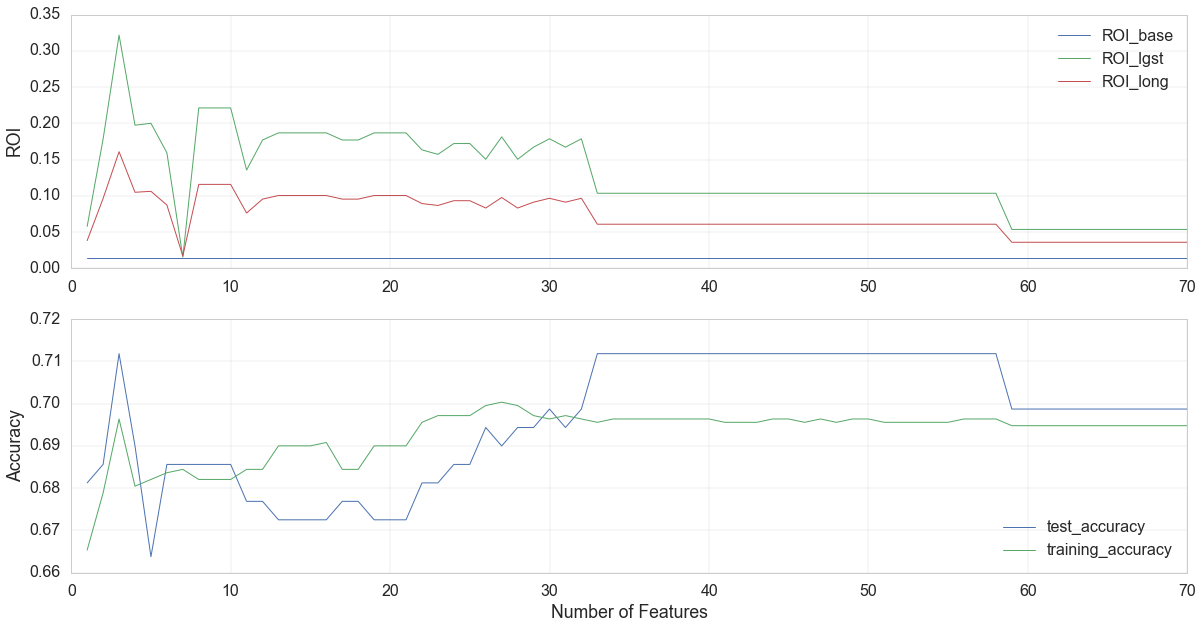

In [296]:
def plot_features_vs_ROI(result):
    number_of_features = result.keys()
    unzipped = zip(*result.values())
    training_accuracy = unzipped[0]
    test_accuracy = unzipped[1]
    ROI_base = unzipped[2]
    ROI_long = unzipped[3]
    ROI_lgst = unzipped[4]

    fig, (ax0, ax1) = plt.subplots(nrows=2, ncols=1, figsize=(20, 10))
    ax0.plot(number_of_features, ROI_base, label="ROI_base", lw=1)
    ax0.plot(number_of_features, ROI_lgst, label="ROI_lgst", lw=1)
    ax0.plot(number_of_features, ROI_long, label="ROI_long", lw=1)
    ax0.set_ylabel("ROI")
    ax0.legend(loc='upper right')
    ax0.grid(linewidth=0.3)
    ax1.plot(number_of_features, test_accuracy, label="test_accuracy", lw=1)
    ax1.plot(number_of_features, training_accuracy, label="training_accuracy", lw=1)
    ax1.legend(frameon=False, loc='lower right')
    ax1.grid(linewidth=0.3)
    ax1.set_ylabel("Accuracy")
    ax1.set_xlabel("Number of Features")

plot_features_vs_ROI(k_result)

#### best result with 3 features, notice a sharp drop at 7 features. I think the result is pretty random due to collinearity introduced by additional features

#### the above for loop is only needed to plot this diagram, in practice SelectKBest can be done in the pipeline within cross validation.  here is an example

In [358]:
selectk = SelectKBest(score_func=f_regression)
pipeLR = Pipeline([('selectk', selectk), ('LR', LogisticRegression(penalty="l1"))])
pipeLR,_,_,_,_ = do_classify(pipeLR, {"selectk__k":range(1,30), "LR__C": [0.01, 0.05, 0.08, 0.1, 0.2]}, 
                             dftouse, lcols, u'results', 1, reuse_split=reuse_split)

In [360]:
print "LR__C: {0}".format(pipeLR.get_params()['LR__C']) 
print "selectk__k: {0}".format(pipeLR.get_params()['selectk__k'])
print  np.array(lcols)[pipeLR.named_steps['selectk'].get_support()].tolist()
evaluate(pipeLR)

LR__C: 0.05
selectk__k: 28
['bb_pct', 'ema_signal1', 'kama_signal1', 'sar_signal', 'plus_di', 'minus_di', 'adx_direction', 'aroon_osc', 'aroon_signal', 'cci', 'macd', 'macd_hist', 'macd_signal', 'ppo', 'mfi', 'roc', 'rsi', 'ult_osc', 'willr', 'wr_signal', 'ad_osc', 'ad_signal', 'stoch_slowk', 'stoch_slowd', 'sslow_signal', 'stoch_fastk', 'stoch_fastd', 'srsi_signal']


(0.70031796502384736,
 0.69432314410480345,
 0.014620033999999942,
 0.083075957799999739,
 0.15035486069999879)

####29 features selcted by SelectKBest gave accuracy of 0.694 and ROI to 15%.  In addition, I am not sure why it did not select just 3 features, which should gave higher score according to plot earlier! one possible explantion is pipeline select the features in cross validation fold, so score is within each fold, while diagram above use score generated from entire training set.


####alternative way to select feature using recursive feature elimination (RFE)

In [278]:
%%time
# Recursive Feature Elimination, VERY SLOW!!!
from sklearn.feature_selection import RFE
k_result = {}
k_features = {}

for k in range(1, 16):    
    model = LogisticRegression(penalty="l1")
    rfe = RFE(model, k)
    rfe = rfe.fit(reuse_split['Xtrain'], reuse_split['ytrain'])
    pipeLR = Pipeline([('rfe', rfe), ('LR', model)])
    pipeLR,_,_,_,_ = do_classify(pipeLR, {"LR__C": [0.005, 0.01, 0.02, 0.05, 10.0]}, dftouse, lcols, u'results', 1, reuse_split=reuse_split)

    k_result[k] = np.array(evaluate(pipeLR))
    k_features[k] = np.array(lcols)[rfe.support_]

Wall time: 1h 13min 18s


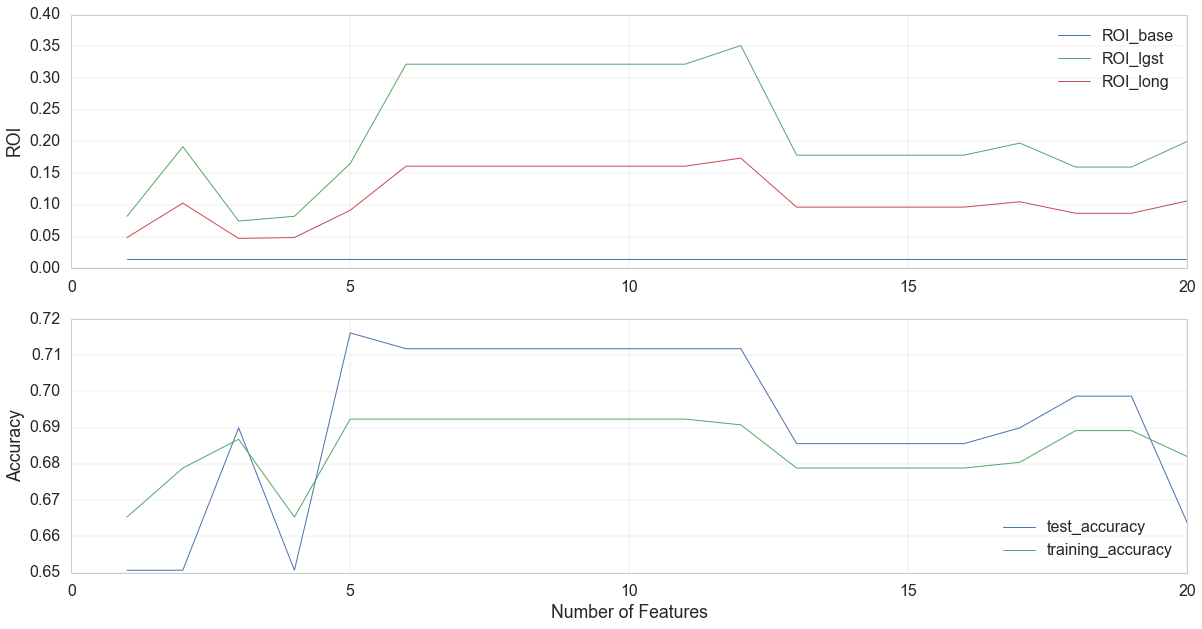

In [279]:
plot_features_vs_ROI(k_result)

#### more consistent result, good ROI and accuracy using 6-12 features selected by RFE, we'll also do this within pipeline

In [351]:
rfe = RFE(LogisticRegression(penalty="l1"))
pipeLR = Pipeline([('rfe', rfe), ('LR', LogisticRegression(penalty="l1"))])
pipeLR,_,_,_,_ = do_classify(pipeLR, {"rfe__n_features_to_select":range(4,12), "LR__C": [0.01, 0.05, 0.08, 0.1, 0.2]}, 
                             dftouse, lcols, u'results', 1, reuse_split=reuse_split)

In [352]:
print "LR__C: {0}".format(pipeLR.get_params()['LR__C']) 
print "rfe__n_features_to_select: {0}".format(pipeLR.get_params()['rfe__n_features_to_select'])
print  np.array(lcols)[pipeLR.named_steps['rfe'].support_].tolist()

LR__C: 0.05
rfe__n_features_to_select: 11
['bb_signalup', 'bb_signaldn', 'bb_signal', 'adx_signal', 'mfi_signal', 'roc_signal', 'rsi', 'rsi_signal', 'wr_signal', 'stoch_slowk', 'cv_signal']


In [357]:
evaluate(pipeLR)

(0.69236883942766292,
 0.71179039301310043,
 0.014620033999999942,
 0.16093366990000013,
 0.32177924460000085)

####11 features selcted by RFE boosted accuracy to 71.2 and ROI to 32%, looks promising